In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from util import show_images, dict_train_test_split
import seaborn as sns
import warnings
# Configuration for QOL improvements
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 5)
plt.ion() # Enable interactive mode

### Load Tabular Data

In [2]:
df = pd.read_csv(os.path.join('data', 'tabular.csv'))
df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,target
0,8315.0,1784.0,21994.0,37115.0,317.0,105.016815,296559.0,321602.0,2470.0,C1,353.0,13223.0,C176,737.0,51.0,17024.0,1178.0,6580.0,273804.0,C1,C1,C9,100026.0,C1,C14,20196559.0,21995936.0,56710.0,63534.0,C13,829.010584,C4,3333778.0,6091.0,110349.0,118786.0,C3,C352,NaN,NaN,3481.0,3045.0,21599.0,6372.0,3922.0,163708.0,C2,C6,1563019.0,2813278.0,1779.0,C4,C4,834148.0,C2,C6,1089,293,C2,7428.249334,300.0
1,8315.0,1272.0,11114.0,18683.0,230.0,NaN,340059.0,368602.0,2820.0,C0,398.0,14998.0,C136,585.0,51.0,NaN,938.0,4006.0,281004.0,C1,C1,C16,100026.0,C2,C18,10089559.0,10990536.0,69940.0,81340.0,C13,829.004752,C4,2138778.0,3403.0,220349.0,236786.0,C3,C301,NaN,NaN,3481.0,3045.0,10847.0,2452.0,1922.0,152668.0,C2,C6,2004919.0,3608698.0,1303.0,C7,C7,401668.0,C5,C6,9801,1085,C7,9693.829502,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357697,8315.0,1784.0,21994.0,37115.0,375.0,105.016815,348759.0,378002.0,2890.0,C0,407.0,15353.0,C234,737.0,71.0,17024.0,1178.0,6892.0,317004.0,C1,C1,C4,66906.0,C2,C18,31707559.0,34530136.0,87004.0,101118.0,C13,829.011304,C4,8873778.0,6091.0,440349.0,472786.0,C4,C307,NaN,NaN,6617.0,4581.0,35935.0,7940.0,4722.0,332068.0,C2,C6,4991119.0,8983858.0,1371.0,C7,C7,1664548.0,C5,C8,2376,1195,C7,9095.239127,180.0
357698,8315.0,1784.0,21994.0,37115.0,317.0,NaN,244359.0,265202.0,2050.0,C0,299.0,11093.0,C140,737.0,51.0,NaN,938.0,4864.0,259404.0,C1,C1,C15,100026.0,C0,C18,19503559.0,21241336.0,81550.0,99726.0,C13,829.007200,C4,4375778.0,4747.0,330349.0,354786.0,C3,C303,NaN,NaN,5049.0,3813.0,18015.0,4020.0,2722.0,203268.0,C2,C6,3691969.0,6645388.0,1371.0,C7,C7,820948.0,C5,C9,9108,502,C3,9379.720939,70.0


### Load Image Data

Shape: (357699, 8, 8)


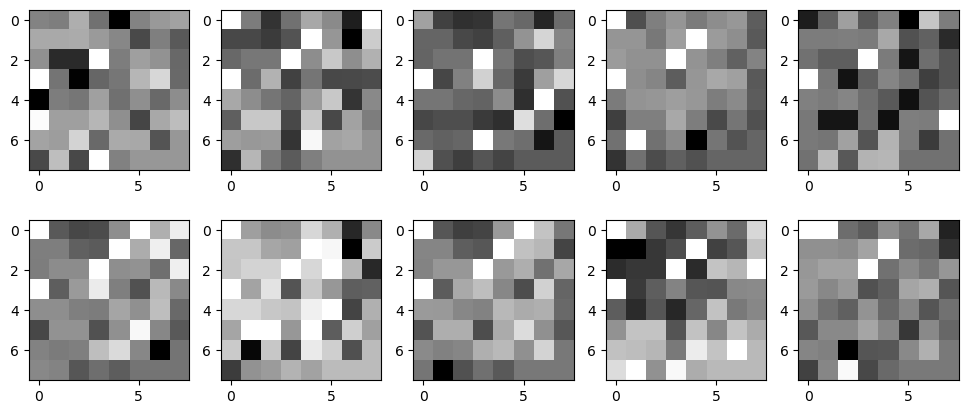

In [3]:
with open(os.path.join('data', 'images.npy'), 'rb') as f:
    images = np.load(f)
    
print('Shape:', images.shape)
show_images(images[:10], n_row=2, n_col=5, figsize=[12,5])

## Data Exploration & Preparation

### Detection and Handling of Missing Values

In [4]:
df = df.dropna(axis=1)
print(np.count_nonzero(df.isna()))
df.shape

0


(357699, 42)

In [5]:
# print(np.count_nonzero(np.isnan(images)))
# if len(images.shape) == 3:
#     a,b,c = images.shape
#     images = images.reshape(a, b*c)
# images.shape

In [6]:
# print(np.count_nonzero(np.isnan(images)))
# print(images.shape)
# df2 = pd.DataFrame(images)
# df2 = df2.dropna(axis=1)
# df2

In [7]:
# df = pd.concat([df, df2], axis=1)
# df

### Data Visualization

<Axes: >

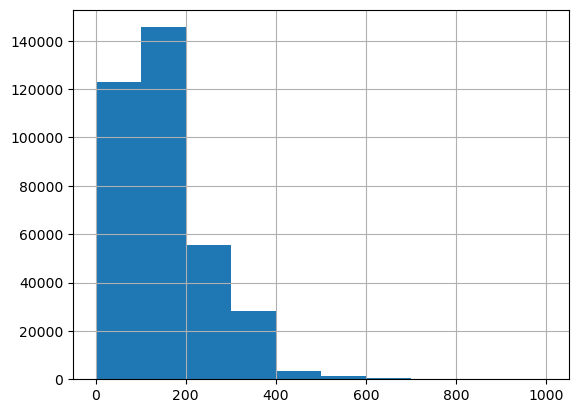

In [8]:
df['target'].hist()

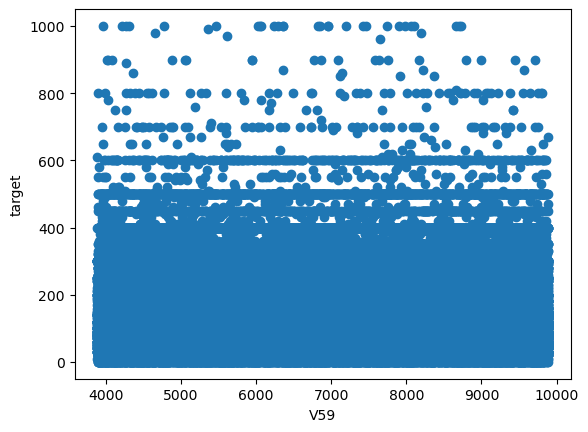

In [9]:
for col in ['V59']:#df.columns:
    plt.xlabel(col)
    plt.ylabel("target")
    plt.scatter(x=df[col], y=df['target'])
    plt.show()

In [10]:
def plot_bw(df):
    target_column = 'target'
    for col in df.columns:
        plt.figure()
        df.plot.scatter(col, target_column)
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.show()
def plot_boxwhisker(X, y):
    plot_bw(pd.concat([X, y.reset_index().drop('index', axis=1)], axis=1))
# plot_bw(df)

In [11]:
for col in df.columns:
    print(col, len(df[col].unique()))

V0 5
V1 17
V2 17
V3 14
V6 40
V7 40
V8 46
V9 2
V10 46
V11 46
V12 349
V13 13
V14 15
V16 9
V17 36
V18 45
V19 2
V20 2
V21 30
V22 3
V23 4
V24 28
V27 176
V28 177
V29 17
V31 8
V37 431
V40 18
V41 18
V43 38
V44 38
V47 7
V48 265
V49 265
V50 12
V53 300
V55 10
V56 200
V57 200
V58 10
V59 340561
target 2620


In [12]:
df.shape

(357699, 42)

## Data Preprocessing

In [13]:
for col in df.columns:
    print(col, df.loc[:, col].dtype)

V0 float64
V1 float64
V2 float64
V3 float64
V6 float64
V7 float64
V8 float64
V9 object
V10 float64
V11 float64
V12 object
V13 float64
V14 float64
V16 float64
V17 float64
V18 float64
V19 object
V20 object
V21 object
V22 float64
V23 object
V24 object
V27 float64
V28 float64
V29 object
V31 object
V37 object
V40 float64
V41 float64
V43 float64
V44 float64
V47 object
V48 float64
V49 float64
V50 float64
V53 float64
V55 object
V56 int64
V57 int64
V58 object
V59 float64
target float64


In [14]:
np.count_nonzero(df.isna())

0

In [15]:
df.columns = df.columns.astype(str)
y = df['target']
X = df.loc[:, df.columns != 'target']
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
X[non_numeric_columns] = X[non_numeric_columns].astype('category')
for col in non_numeric_columns:
    X[col] = pd.factorize(X[col])[0]
X

,V0,V1,V2,V3,V6,V7,V8,V9,V10,V11,V12,V13,V14,V16,V17,V18,V19,V20,V21,V22,V23,V24,V27,V28,V29,V31,V37,V40,V41,V43,V44,V47,V48,V49,V50,V53,V55,V56,V57,V58,V59
0,8315.0,1784.0,21994.0,37115.0,296559.0,321602.0,2470.0,0,353.0,13223.0,0,737.0,51.0,1178.0,6580.0,273804.0,0,0,0,100026.0,0,0,56710.0,63534.0,0,0,0,3481.0,3045.0,6372.0,3922.0,0,1563019.0,2813278.0,1779.0,834148.0,0,1089,293,0,7428.249334
1,8315.0,1272.0,11114.0,18683.0,340059.0,368602.0,2820.0,1,398.0,14998.0,1,585.0,51.0,938.0,4006.0,281004.0,0,0,1,100026.0,1,1,69940.0,81340.0,0,0,1,3481.0,3045.0,2452.0,1922.0,0,2004919.0,3608698.0,1303.0,401668.0,0,9801,1085,1,9693.829502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357697,8315.0,1784.0,21994.0,37115.0,348759.0,378002.0,2890.0,1,407.0,15353.0,18,737.0,71.0,1178.0,6892.0,317004.0,0,0,8,66906.0,1,1,87004.0,101118.0,0,0,3,6617.0,4581.0,7940.0,4722.0,0,4991119.0,8983858.0,1371.0,1664548.0,9,2376,1195,1,9095.239127
357698,8315.0,1784.0,21994.0,37115.0,244359.0,265202.0,2050.0,1,299.0,11093.0,34,737.0,51.0,938.0,4864.0,259404.0,0,0,6,100026.0,3,1,81550.0,99726.0,0,0,2,5049.0,3813.0,4020.0,2722.0,0,3691969.0,6645388.0,1371.0,820948.0,3,9108,502,6,9379.720939


In [16]:
# for col in X.columns:
#     plt.xlabel(col)
#     plt.ylabel("target")
#     plt.scatter(x=X[col], y=y)
#     plt.show()

In [17]:
X.columns

Index(['V0', 'V1', 'V2', 'V3', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V27', 'V28', 'V29', 'V31', 'V37', 'V40', 'V41', 'V43', 'V44',
       'V47', 'V48', 'V49', 'V50', 'V53', 'V55', 'V56', 'V57', 'V58', 'V59'],
      dtype='object')

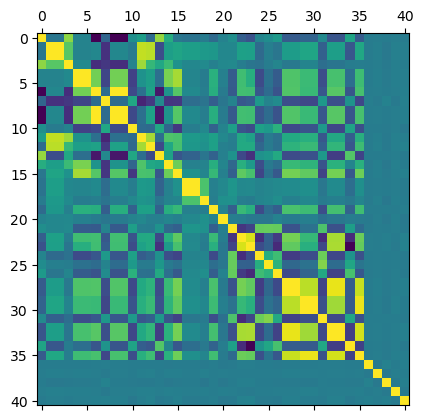

In [18]:
plt.matshow(X.corr())
plt.show()

### Feature Selection

In [56]:
# ref https://stackoverflow.com/questions/44889508/remove-highly-correlated-columns-from-a-pandas-dataframe
def findCorrelation(corr, cutoff=0.9, exact=None):
    """
    This function is the Python implementation of the R function 
    `findCorrelation()`.
    
    Relies on numpy and pandas, so must have them pre-installed.
    
    It searches through a correlation matrix and returns a list of column names 
    to remove to reduce pairwise correlations.
    
    For the documentation of the R function, see 
    https://www.rdocumentation.org/packages/caret/topics/findCorrelation
    and for the source code of `findCorrelation()`, see
    https://github.com/topepo/caret/blob/master/pkg/caret/R/findCorrelation.R
    
    -----------------------------------------------------------------------------

    Parameters:
    -----------
    corr: pandas dataframe.
        A correlation matrix as a pandas dataframe.
    cutoff: float, default: 0.9.
        A numeric value for the pairwise absolute correlation cutoff
    exact: bool, default: None
        A boolean value that determines whether the average correlations be 
        recomputed at each step
    -----------------------------------------------------------------------------
    Returns:
    --------
    list of column names
    -----------------------------------------------------------------------------
    Example:
    --------
    R1 = pd.DataFrame({
        'x1': [1.0, 0.86, 0.56, 0.32, 0.85],
        'x2': [0.86, 1.0, 0.01, 0.74, 0.32],
        'x3': [0.56, 0.01, 1.0, 0.65, 0.91],
        'x4': [0.32, 0.74, 0.65, 1.0, 0.36],
        'x5': [0.85, 0.32, 0.91, 0.36, 1.0]
    }, index=['x1', 'x2', 'x3', 'x4', 'x5'])

    findCorrelation(R1, cutoff=0.6, exact=False)  # ['x4', 'x5', 'x1', 'x3']
    findCorrelation(R1, cutoff=0.6, exact=True)   # ['x1', 'x5', 'x4'] 
    """
    
    def _findCorrelation_fast(corr, avg, cutoff):

        combsAboveCutoff = corr.where(lambda x: (np.tril(x)==0) & (x > cutoff)).stack().index

        rowsToCheck = combsAboveCutoff.get_level_values(0)
        colsToCheck = combsAboveCutoff.get_level_values(1)

        msk = avg[colsToCheck] > avg[rowsToCheck].values
        deletecol = pd.unique(np.r_[colsToCheck[msk], rowsToCheck[~msk]]).tolist()

        return deletecol


    def _findCorrelation_exact(corr, avg, cutoff):

        x = corr.loc[(*[avg.sort_values(ascending=False).index]*2,)]

        if (x.dtypes.values[:, None] == ['int64', 'int32', 'int16', 'int8']).any():
            x = x.astype(float)

        x.values[(*[np.arange(len(x))]*2,)] = np.nan

        deletecol = []
        for ix, i in enumerate(x.columns[:-1]):
            for j in x.columns[ix+1:]:
                if x.loc[i, j] > cutoff:
                    if x[i].mean() > x[j].mean():
                        deletecol.append(i)
                        x.loc[i] = x[i] = np.nan
                    else:
                        deletecol.append(j)
                        x.loc[j] = x[j] = np.nan
        return deletecol

    
    if not np.allclose(corr, corr.T) or any(corr.columns!=corr.index):
        raise ValueError("correlation matrix is not symmetric.")
        
    acorr = corr.abs()
    avg = acorr.mean()
        
    if exact or exact is None and corr.shape[1]<100:
        return _findCorrelation_exact(acorr, avg, cutoff)
    else:
        return _findCorrelation_fast(acorr, avg, cutoff)

def trim_correlated(df, threshold):
    corr = df.corr()
    hc = findCorrelation(corr, cutoff=0.99)
    return df.drop(columns=hc)

In [133]:
# cols_to_drop = ['V55', 'V56', 'V57', 'V58', 'V59']
# cols_to_drop = []
# X_train = X.drop(cols_to_drop, axis=1)
# X_train = trim_correlated(X_train, 0.99)
# cols_to_sqrt = ['V37', 'V48', 'V49', 'V53']
# cols_to_sqrt = np.intersect1d(cols_to_sqrt, X_train.columns)
# X_train[cols_to_sqrt] = X_train[cols_to_sqrt].apply(np.sqrt)
X_train = X.drop([])
y_train = y.copy()

In [134]:
print(X_train.shape)
print(y_train.shape)

(357699, 60)
(357699,)


In [135]:
X_train = trim_correlated(X_train, 0.99)

ValueError: could not convert string to float: 'C1'

In [34]:
X_train.shape

(357699, 35)

<Figure size 640x480 with 0 Axes>

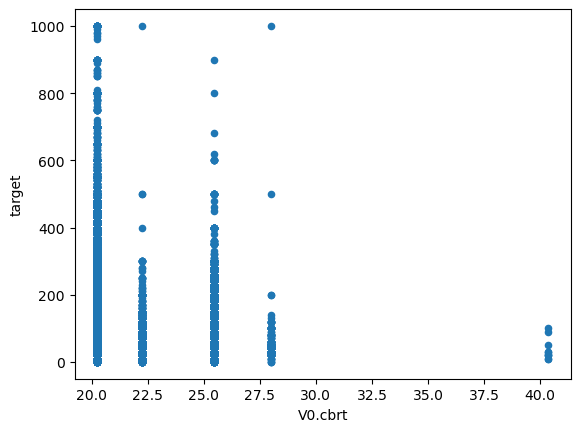

<Figure size 640x480 with 0 Axes>

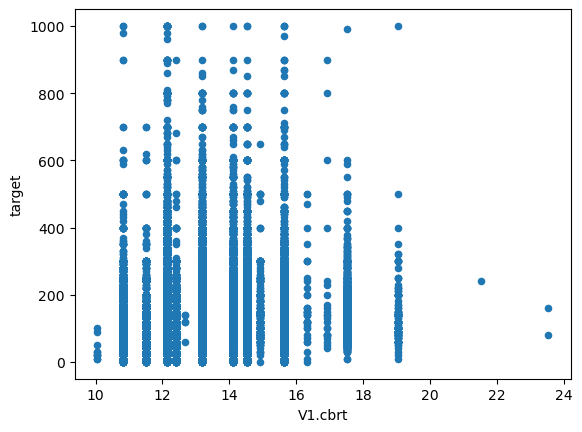

<Figure size 640x480 with 0 Axes>

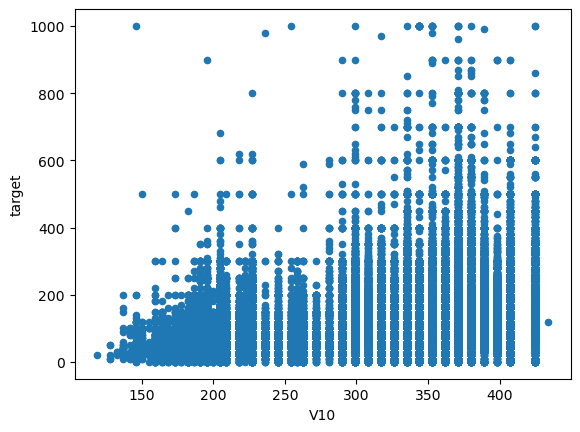

<Figure size 640x480 with 0 Axes>

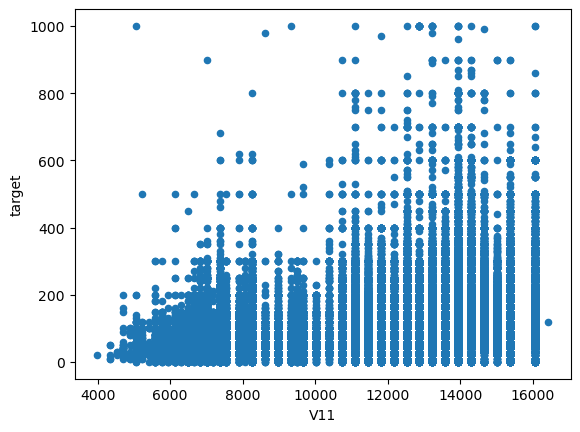

<Figure size 640x480 with 0 Axes>

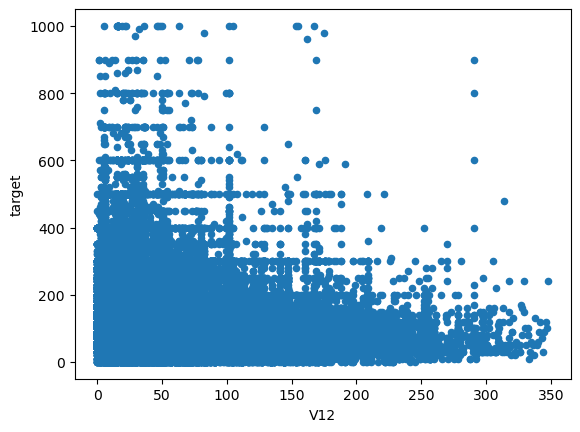

<Figure size 640x480 with 0 Axes>

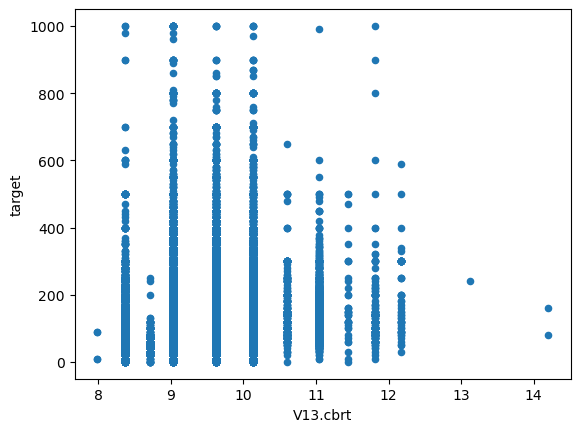

<Figure size 640x480 with 0 Axes>

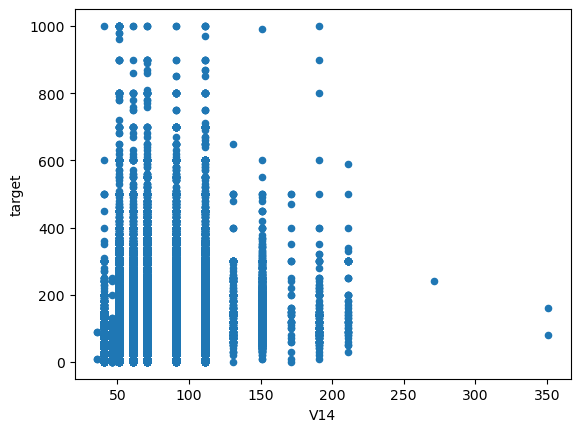

<Figure size 640x480 with 0 Axes>

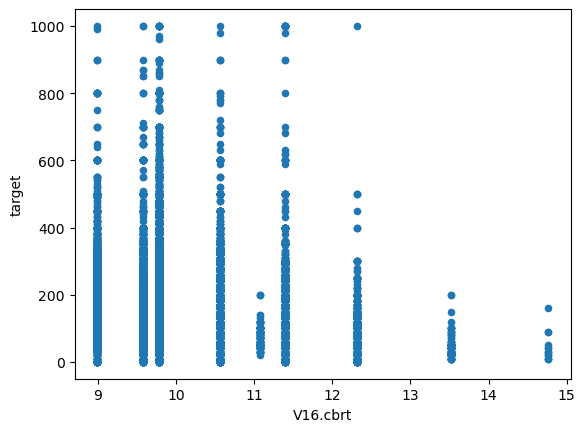

<Figure size 640x480 with 0 Axes>

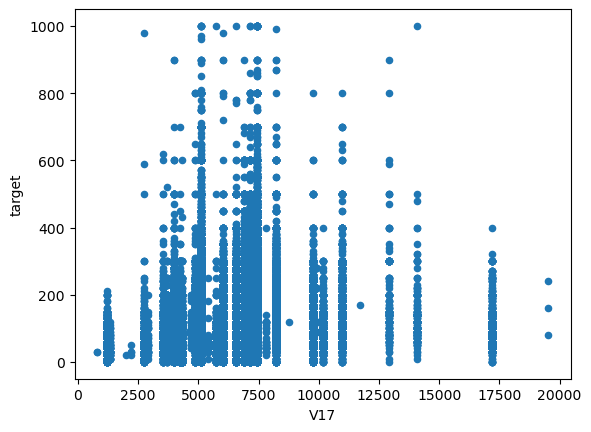

<Figure size 640x480 with 0 Axes>

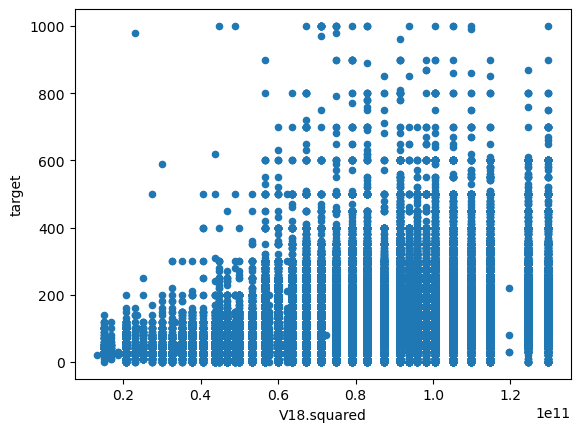

<Figure size 640x480 with 0 Axes>

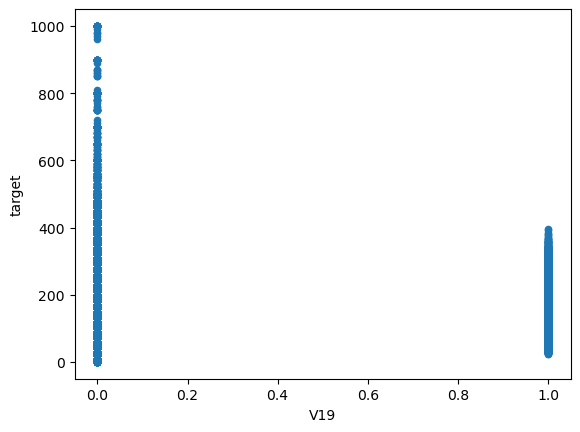

<Figure size 640x480 with 0 Axes>

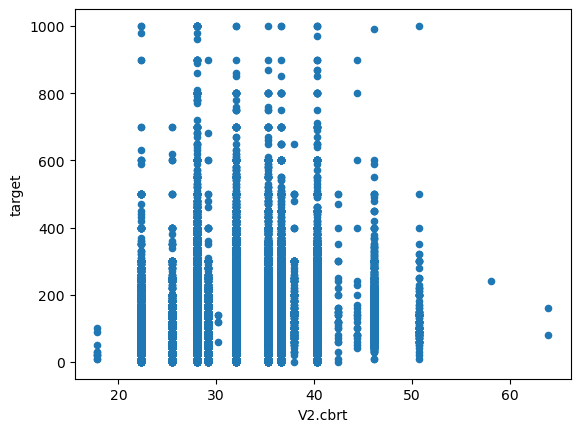

<Figure size 640x480 with 0 Axes>

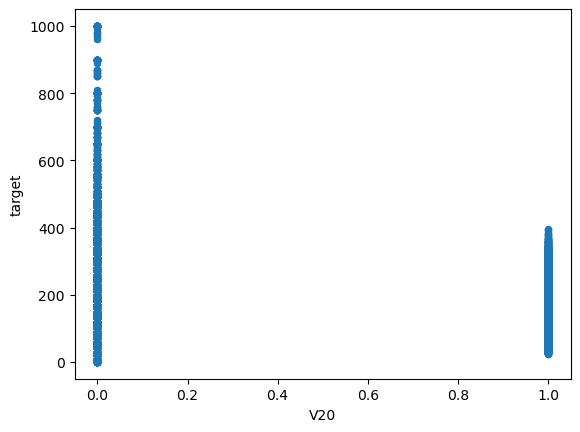

<Figure size 640x480 with 0 Axes>

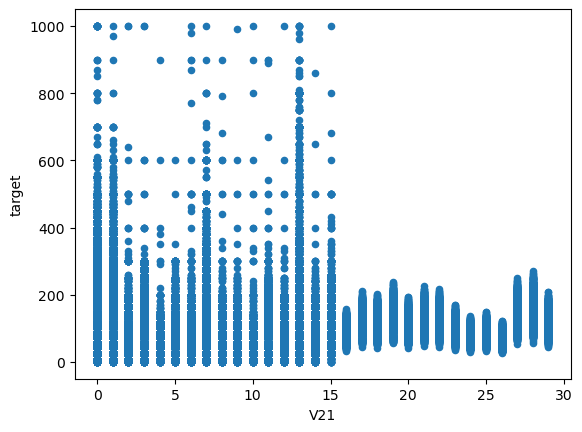

<Figure size 640x480 with 0 Axes>

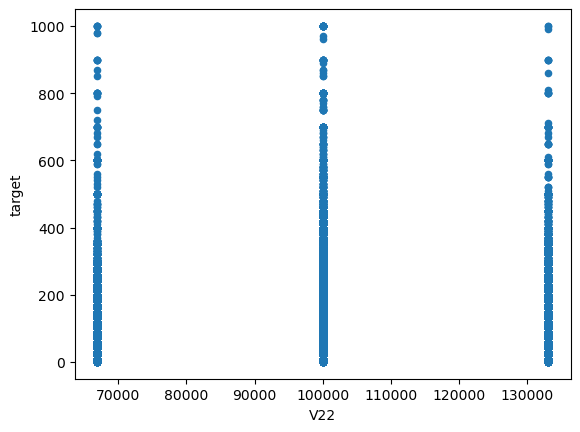

<Figure size 640x480 with 0 Axes>

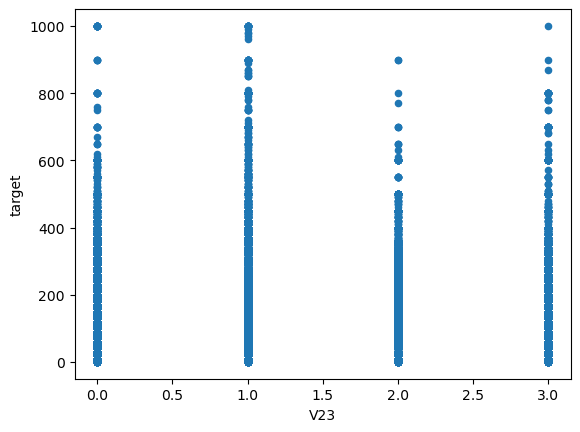

<Figure size 640x480 with 0 Axes>

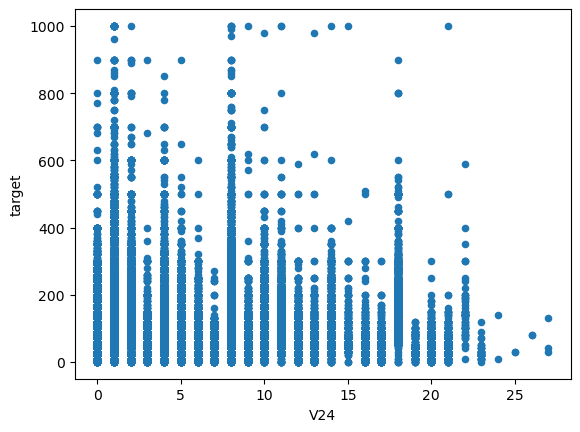

<Figure size 640x480 with 0 Axes>

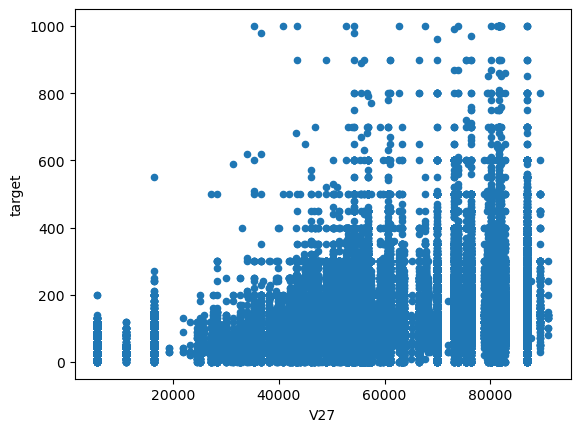

<Figure size 640x480 with 0 Axes>

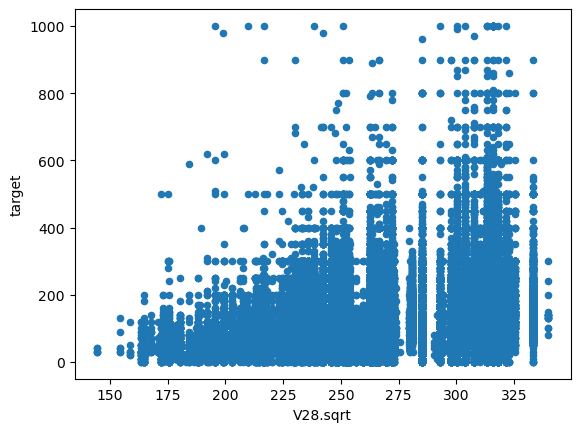

<Figure size 640x480 with 0 Axes>

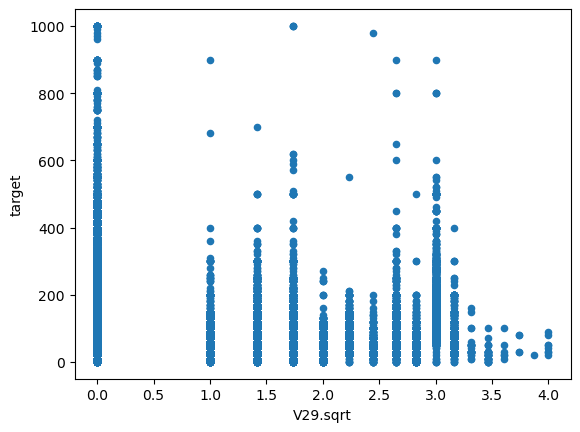

<Figure size 640x480 with 0 Axes>

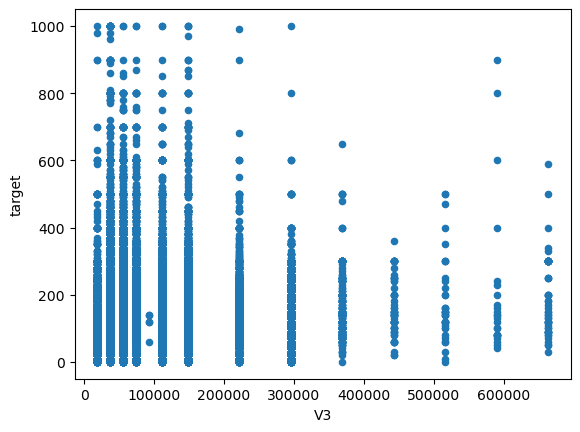

<Figure size 640x480 with 0 Axes>

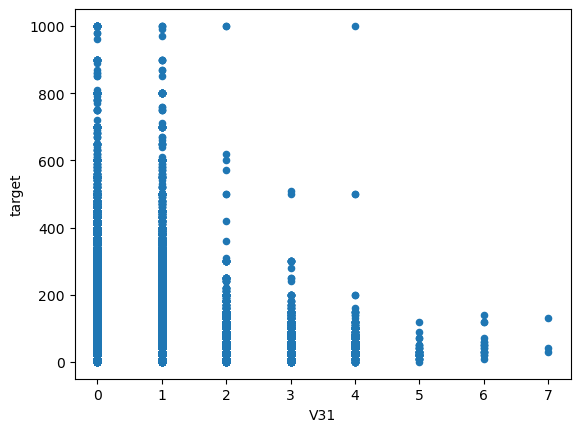

<Figure size 640x480 with 0 Axes>

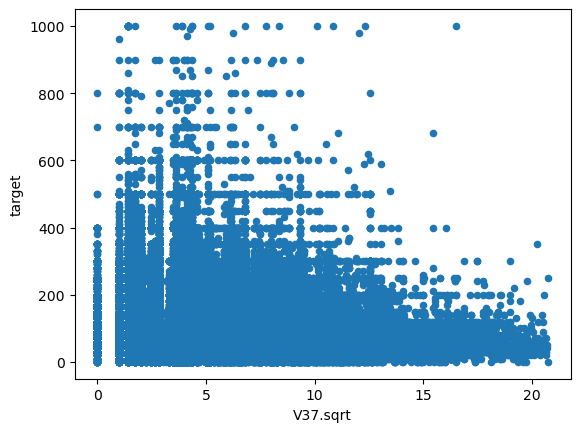

<Figure size 640x480 with 0 Axes>

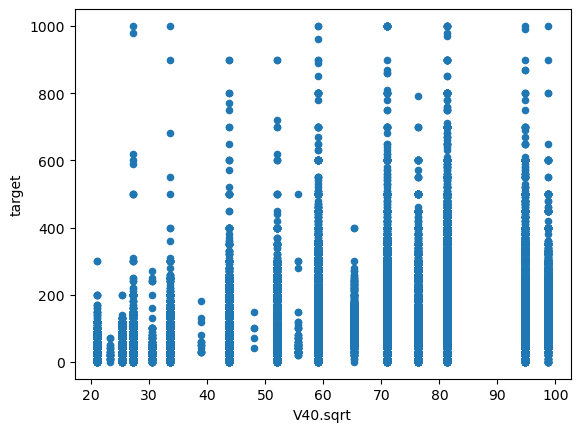

<Figure size 640x480 with 0 Axes>

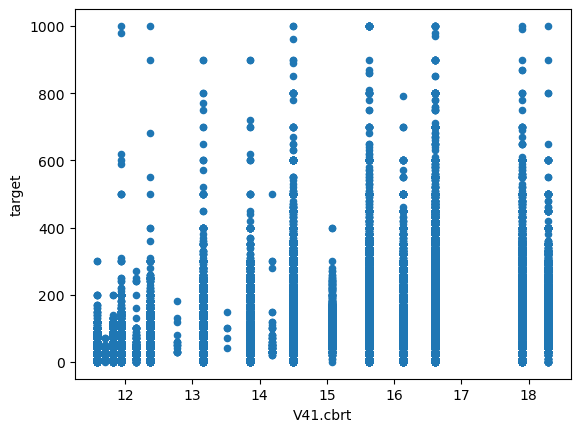

<Figure size 640x480 with 0 Axes>

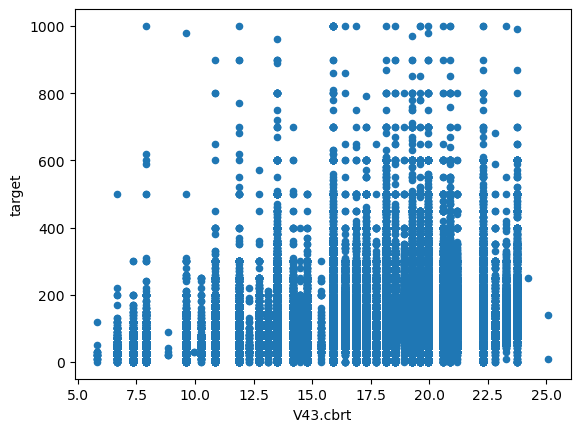

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [35]:
plot_boxwhisker(X_train.reindex(sorted(X_train.columns), axis=1), y_train)

In [36]:
X_train.columns

Index(['V0.cbrt', 'V1.cbrt', 'V10', 'V11', 'V12', 'V13.cbrt', 'V14',
       'V16.cbrt', 'V17', 'V18.squared', 'V19', 'V2.cbrt', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V27', 'V28.sqrt', 'V29.sqrt', 'V3', 'V31', 'V37.sqrt',
       'V40.sqrt', 'V41.cbrt', 'V43.cbrt', 'V44.cbrt', 'V47.cbrt', 'V48.cbrt',
       'V49.cbrt', 'V50.cbrt', 'V53.cbrt', 'V6.sqrt', 'V7.sqrt', 'V8.sqrt'],
      dtype='object')

In [8]:
import numpy as np
import pandas as pd
# from sklearn.linear_model import *
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

class CustomTransformer:
    def __init__(self):
        self.scaler = StandardScaler()
        # self.final_cols = ['V0.cbrt', 'V1.cbrt', 'V10', 'V11', 'V12', 'V13.cbrt', 'V14', 'V16.cbrt', 'V17',
        #                    'V18.squared', 'V19', 'V2.cbrt', 'V20', 'V21', 'V22', 'V23', 'V24', 'V27', 'V28.sqrt',
        #                    'V29.sqrt', 'V3', 'V31', 'V37.sqrt', 'V40.sqrt', 'V41.cbrt', 'V43.cbrt', 'V44.cbrt',
        #                    'V47.cbrt', 'V48.cbrt', 'V49.cbrt', 'V50.cbrt', 'V53.cbrt', 'V6.sqrt', 'V7.sqrt',
        #                    'V8.sqrt']
        self.final_cols = ['V0.cbrt', 'V1.cbrt', 'V12', 'V13.cbrt', 'V14', 'V16.cbrt', 'V17',
                           'V18.squared', 'V19', 'V21', 'V22', 'V23', 'V24', 'V27', 'V28.sqrt',
                           'V29.sqrt', 'V3', 'V31', 'V37.sqrt', 'V41.cbrt', 'V44.cbrt', 'V47.cbrt',
                           'V48.cbrt', 'V50.cbrt', 'V53.cbrt', 'V7.sqrt', 'V8.sqrt']

    def feature_engineering(self, X):
        X.fillna(X.mode().iloc[0], inplace=True)
        non_numeric_columns = X.columns[X.dtypes == 'object']
        X.loc[:,non_numeric_columns] = X.loc[:,non_numeric_columns].astype('category').apply(lambda col: pd.factorize(col)[0])
        X = X.astype(float)
        for key in self.final_cols:
            col_func = key.split('.')
            if len(col_func) != 2:
                continue
            col, func = col_func
            if col not in X.columns:
                continue
            if func == 'cubed':
                X.loc[:,col] = np.pow(X.loc[:,col], 3)
            elif func == 'squared':
                sign = np.sign(X.loc[:,col])
                X.loc[:,col] = np.square(X.loc[:,col]) * sign
            elif func == 'sqrt':
                sign = np.sign(X.loc[:,col])
                X.loc[:,col] = np.sqrt(X.loc[:,col].abs()) * sign
            elif func == 'cbrt':
                X.loc[:,col] = np.cbrt(X.loc[:,col])
            else:
                assert 0
        return X

    def fit(self, X, y=None):
        X = self.feature_engineering(X)
        self.scaler.fit(X, y)
        return self

    def transform(self, X):
        X = self.feature_engineering(X)
        X = self.scaler.transform(X)
        return X

    def fit_transform(self, X, y=None):
        X = self.feature_engineering(X)
        return self.scaler.fit_transform(X)

class Model:
    def __init__(self, params=None):
        if params is None:
            params = {
                'learning_rate': 0.10131344283675378,
                'max_iter': 250,
                'max_leaf_nodes': 289,
                'max_depth': 86,
                'min_samples_leaf': 230,
                'l2_regularization': 0.0009789336136399344
            }
        self.fitted = False
        self.model = HistGradientBoostingRegressor(**params, random_state=12397)
        # self.model = LinearRegression()
        self.transformer = CustomTransformer()
        self.X_train = None
        self.y_train = None

    def fit(self, X_dict, y):
        # X = X_dict['tabular']
        # X = self.transformer.fit_transform(X, y)
        # self.model.fit(X, y)
        self.X_train = X_dict['tabular'] if type(X_dict) is dict else X_dict
        self.y_train = y
        self.fitted = False
        return self

    def predict(self, X_dict):
        X_test = X_dict['tabular'] if type(X_dict) is dict else X_dict
        X_train, y_train = self.X_train, self.y_train
        N = len(X_train)
        X_combined = self.transformer.fit_transform(pd.concat([X_train, X_test]))
        X_train, X_test = X_combined[:N], X_combined[N:]
        self.model.fit(X_train, y_train)
        # self.fitted = True
        return self.model.predict(X_test)
        # if self.fitted:
        #     X_test = self.transformer.transform(X_test)
        #     return self.model.predict(X_test)
        # else:
        #     X_train, y_train = self.X_train, self.y_train
        #     N = len(X_train)
        #     X_combined = self.transformer.fit_transform(pd.concat([X_train, X_test]))
        #     X_train, X_test = X_combined[:N], X_combined[N:]
        #     self.model.fit(X_train, y_train)
        #     self.fitted = True
        #     return self.model.predict(X_test)

In [9]:
import os
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

df = pd.read_csv(os.path.join('data', 'tabular.csv'))
X = df.drop('target', axis=1)
y = df['target']
def train_validate(model, n_splits=3, random_state=None):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    mse_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_scores.append(mean_squared_error(y_test, y_pred))
    return np.mean(mse_scores)

## Modeling & Evaluation

### Creating models

In [6]:
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.tree import *

models = [
          # LinearRegression(),
          # HistGradientBoostingRegressor(),
          Model(),
          # HistGradientBoostingRegressor(max_iter=250, max_leaf_nodes=64, min_samples_leaf=32),
          # SVR(),
         ]
random_state = np.random.randint(0, 2**31-1)
for model in models:
    print(model, train_validate(model, random_state=random_state))

<__main__.Model object at 0x0000027B1149A790> 2287.4613121558873


In [9]:
assert 0

AssertionError: 

In [20]:
import optuna
def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5, log=True),
        'max_iter': trial.suggest_int('max_iter', 250, 250),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 512),
        'max_depth': trial.suggest_int('max_depth', 2, 512),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 512),
        'l2_regularization': trial.suggest_float('l2_regularization', 1e-5, 2.0, log=True),
    }
    model = Model(params=params)
    return train_validate(model)

In [21]:
# study = optuna.create_study(direction='minimize')

In [22]:
study.optimize(objective, n_trials=100)
print("DONE")
trial = study.best_trial
best_params = trial.params
print('MSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(best_params))

[I 2023-11-22 17:03:54,343] Trial 193 finished with value: 2288.8793055174197 and parameters: {'learning_rate': 0.17475927062695903, 'max_leaf_nodes': 86, 'max_depth': 11, 'min_samples_leaf': 83, 'l2_regularization': 0.0004713955207576419}. Best is trial 162 with value: 2282.4870326584746.
[I 2023-11-22 17:04:12,635] Trial 194 finished with value: 2282.7270685088693 and parameters: {'learning_rate': 0.10621170803886247, 'max_leaf_nodes': 85, 'max_depth': 219, 'min_samples_leaf': 82, 'l2_regularization': 0.0006098268674867058}. Best is trial 162 with value: 2282.4870326584746.
[I 2023-11-22 17:04:29,661] Trial 195 finished with value: 2284.02235877368 and parameters: {'learning_rate': 0.12578700079023192, 'max_leaf_nodes': 86, 'max_depth': 211, 'min_samples_leaf': 83, 'l2_regularization': 0.0006817586074627341}. Best is trial 162 with value: 2282.4870326584746.
[I 2023-11-22 17:04:46,166] Trial 196 finished with value: 2288.132908842726 and parameters: {'learning_rate': 0.15698665989370

DONE
MSE: 2274.0024968315233
Best hyperparameters: {'learning_rate': 0.10131344283675378, 'max_leaf_nodes': 289, 'max_depth': 86, 'min_samples_leaf': 230, 'l2_regularization': 0.0009789336136399344}


In [ ]:
assert 0

In [ ]:
import torch
import torch.nn as nn
def reset_parameters(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
# X_train = torch.tensor(X_train.values, dtype=torch.float32).cuda()
# y_train = torch.tensor(y_train.values, dtype=torch.float32).cuda()
# X_test = torch.tensor(X_test.values, dtype=torch.float32).cuda()
# y_test = torch.tensor(y_test.values, dtype=torch.float32).cuda()

In [ ]:
print(np.count_nonzero(np.isnan(images)))
print(np.count_nonzero(X.isna()))

In [ ]:
tabular_data = torch.tensor(X.to_numpy(), dtype=torch.float32).cuda()
image_data = images.copy()
image_data[np.isnan(image_data)] = 0
image_data = torch.tensor(image_data, dtype=torch.float32).cuda()
image_data = image_data.reshape(-1,1,8,8)
labels = torch.tensor(y.to_numpy(), dtype=torch.float32).cuda()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
# X_train = torch.tensor(X_train, dtype=torch.float32).cuda()
# y_train = torch.tensor(y_train, dtype=torch.float32).cuda()
# X_test = torch.tensor(X_test, dtype=torch.float32).cuda()
# y_test = torch.tensor(y_test, dtype=torch.float32).cuda()

In [ ]:
from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, tabular_data, image_data, labels):
        self.tabular_data = tabular_data
        self.image_data = image_data
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        tabular_sample = torch.tensor(self.tabular_data[index], dtype=torch.float32)
        image_sample = torch.tensor(self.image_data[index], dtype=torch.float32)
        label = torch.tensor(self.labels[index], dtype=torch.float32)

        return tabular_sample, image_sample, label

In [ ]:
class HybridModel(nn.Module):
    def __init__(self, num_tabular_features, num_classes):
        super().__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3), nn.ReLU(),
            nn.Conv2d(8, 16, kernel_size=3), nn.ReLU(),
            nn.Flatten()
        )
        self.tabular_fc = nn.Sequential(
            nn.Linear(num_tabular_features, 64), nn.ReLU(),
        )
        self.final_fc = nn.Sequential(
            nn.Linear(320, 256), nn.ReLU(),
            nn.Linear(256, 128), nn.ReLU(),
            nn.Linear(128, num_classes),
        )

    def forward(self, tabular_input, image_input):
        tabular_output = self.tabular_fc(tabular_input)
        image_output = self.cnn_model(image_input)
        combined_output = torch.cat([tabular_output, image_output], dim=1)
        final_output = self.final_fc(combined_output)
        return final_output

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from random import randint

dataset = CustomDataset(tabular_data, image_data, labels)
dataloader = DataLoader(dataset, batch_size=4096, shuffle=True)

num_tabular_features = tabular_data.shape[1]
num_classes = 1
model = HybridModel(num_tabular_features, num_classes).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.02, amsgrad=True)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 2, gamma=0.5) 
criterion = nn.MSELoss()
epochs = 10
for epoch in range(epochs):
    for tabular_batch, image_batch, label_batch in dataloader:
        optimizer.zero_grad()
        output = model(tabular_batch, image_batch)
        loss = criterion(output, label_batch)
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

### 11. Hyperparameters Search

### 12. Model Evaluation